<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

## 📚 Libraries Import


In [39]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# For modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


# For evaluation
from collections import Counter
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Disable warnings [DataConversionWarning & ConvergenceWarning]
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## 🧮 Import Databases

In [29]:
# Importing the dataset
X_train = pd.read_parquet('data/2ndNotebook/X_train.parquet')
X_val = pd.read_parquet('data/2ndNotebook/X_val.parquet')
y_train = pd.read_parquet('data/2ndNotebook/y_train.parquet')
y_val = pd.read_parquet('data/2ndNotebook/y_val.parquet')

test_data = pd.read_parquet('data/2ndNotebook/test_data.parquet')

In [30]:
# Display the first 2 rows of each dataset
X_train.head(2) 

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,Gender,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Birth Year Clean,Age at Injury Clean,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution_encoded,Attorney/Representative_encoded,Carrier Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,Gender_encoded,Medical Fee Region_encoded
0,69,N,Y,757.03,1950.0,1A. PRIVATE,5447471,KINGS,N,M,72.0,IV,99.0,28.0,36.0,4,1950.0,69.0,2020.0,2.0,21.0,4.0,2020,3,9,0,2020.0,4.0,29.0,2.0,0,1,0,23,0,1,3
1,40,N,N,0.00,1980.0,3A. SELF PUBLIC,5523318,BRONX,N,M,92.0,IV,17.0,43.0,36.0,4,1980.0,40.0,2020.0,7.0,9.0,3.0,2020,7,24,4,2020.0,7.0,24.0,4.0,0,0,2,2,0,1,3


In [31]:
test_data.head(2)

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,Gender,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Birth Year Clean,Age at Injury Clean,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution_encoded,Attorney/Representative_encoded,Carrier Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,Gender_encoded,Medical Fee Region_encoded
0,19,N,N,183.343831,2003.0,1A. PRIVATE,6165911,BRONX,N,M,48.0,IV,31.0,10.0,54.0,1,2003.0,19.0,2022.0,12.0,24.0,5.0,2023,1,2,0,2023.0,1.0,2.0,0.0,0,0,0,2,0,1,3
1,19,N,N,183.343831,2003.0,1A. PRIVATE,6166141,QUEENS,N,F,45.0,IV,75.0,10.0,10.0,1,2003.0,19.0,2022.0,11.0,20.0,6.0,2023,1,2,0,2023.0,1.0,2.0,0.0,0,0,0,40,0,0,3


# <a class='anchor' id='3'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>3 | Modeling & Evaluation</b></h1></center>
</div>

<br><br>

#### **📈📉 Data Normalization**

In [32]:
# Standardize the data [For the 'KNN' and 'Logistic Regression' models, let's normalize the variables]
# X_train = StandardScaler().fit_transform(X_train)
# X_validation = StandardScaler().fit_transform(X_validation)
# X_test = StandardScaler().fit_transform(X_test)

In [33]:
############################################ [TEMPORARY] ############################################
# Drop 'object' columns
X_train = X_train.select_dtypes(exclude=['object'])
X_val = X_val.select_dtypes(exclude=['object'])
test_data = test_data.select_dtypes(exclude=['object'])
####################################################################################################

In [34]:
# Min-Max Normalization
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_validation_norm = MinMaxScaler().fit_transform(X_val)
X_test_norm = MinMaxScaler().fit_transform(test_data)

# **💡 Modeling**

In [63]:
# Function that will print the results of the classification report and the confusion matrix for both datasets (train and validation)
def classification_metrics(y_train, pred_train, pred_train_proba, 
                           y_val, pred_val, pred_val_proba):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train, target_names=[str(i) for i in np.unique(y_train)], zero_division=1))  
    # zero_division=1 to avoid warnings -> y_true contains labels that are not present in your predictions (y_pred)
    print('\nAUROC:', round(roc_auc_score(y_train, pred_train_proba, multi_class='ovr'), 2)) # 'ovr' for multiclass

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val, target_names=[str(i) for i in np.unique(y_val)], zero_division=1))
    print('\nAUROC:', round(roc_auc_score(y_val, pred_val_proba, multi_class='ovr'), 2))  # 'ovr' for multiclass
    
    # Confusion Matrix for Train and Validation side by side
    fig, ax = plt.subplots(1,2, figsize=(8,4))
    sns.heatmap(confusion_matrix(y_train, pred_train, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7}, 
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val), ax=ax[0])
    ax[0].set_title('Confusion matrix [Train]\n', fontsize=12, fontweight='bold')
    ax[0].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[0].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[0].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    sns.heatmap(confusion_matrix(y_val, pred_val, labels=np.unique(y_val)),
                annot=True, annot_kws={"size": 7},
                fmt='d', cmap='Blues', cbar=False, 
                xticklabels=np.unique(y_val), yticklabels=np.unique(y_val),ax=ax[1])
    ax[1].set_title('Confusion matrix [Validation]\n', fontsize=12, fontweight='bold')
    ax[1].set_xlabel('\nPredicted', fontsize=8, fontweight='bold')
    ax[1].set_yticklabels(labels=np.unique(y_val), rotation=0)
    ax[1].set_ylabel('True\n', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

---

### **Logistic Regression[<sup>[1]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [67]:
# Logistic Regression
lr = LogisticRegression()
cv = cross_val_score(lr,X_train_norm,y_train,cv=5)

# Train the model
lr.fit(X_train_norm, y_train)

# Test the model [on the train set]
lr_predicted_prob_train = lr.predict_proba(X_train_norm)
lr_predicted_train = lr.predict(X_train_norm)
lr_y_proba_train = lr.predict_proba(X_train_norm)

# Accuracy
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, lr_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, lr_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, lr_predicted_train, average='macro'), 2))

# Test the model [on the validation set]
lr_predicted_val_prob = lr.predict_proba(X_validation_norm)
lr_predicted_val = lr.predict(X_validation_norm)
lr_y_proba = lr.predict_proba(X_validation_norm)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, lr_predicted_val),2))
print("Validation | AUC:", round(roc_auc_score(y_val, lr_predicted_val_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, lr_predicted_val, average='macro'), 2))

Accuracy (overall correct predictions): 0.63
AUC: 0.79
F1-Score (macro): 0.21
Accuracy (overall correct predictions): 0.63
AUC: 0.79
F1-Score (macro): 0.21


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.11      0.01      0.01      8734
           2       0.69      0.93      0.79    203754
           3       0.00      0.00      0.00     48234
           4       0.52      0.52      0.52    103955
           5       0.50      0.31      0.38     33796
           6       0.00      0.00      0.00      2948
           7       1.00      0.00      0.00        68
           8       1.00      0.00      0.00       329

    accuracy                           0.63    401818
   macro avg       0.48      0.22      0.21    401818
weighted avg       0.53      0.63      0.57    401818


AUROC: 0.79
____________

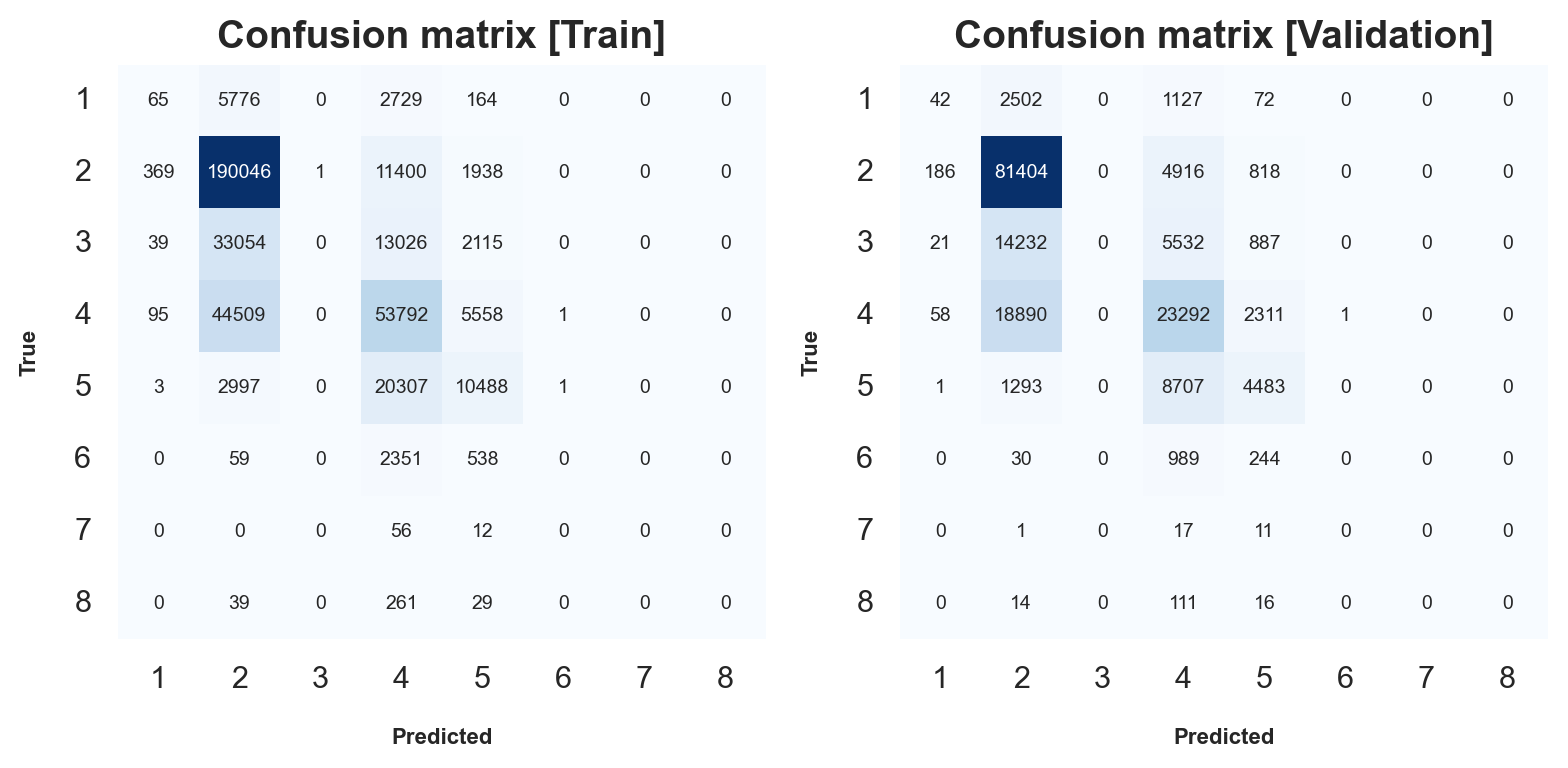

In [59]:
# Classification Metrics & Confusion Matrix
classification_metrics(y_train, lr_predicted_train, lr_predicted_prob_train, y_val, lr_predicted_val, lr_predicted_val_prob)

### **Naive Bayes[<sup>[2]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html)**

In [64]:
# Naive Bayes
nb = GaussianNB()
cv = cross_val_score(nb,X_train_norm,y_train,cv=5)

# Train the model
nb.fit(X_train_norm, y_train)

# Test the model [on the Train set]
nb_predicted_prob_train = nb.predict_proba(X_train_norm)
nb_predicted_train = nb.predict(X_train_norm)
nb_y_proba_train = nb.predict_proba(X_train_norm)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, nb_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, nb_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, nb_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
nb_predicted_prob = nb.predict_proba(X_validation_norm)
nb_predicted = nb.predict(X_validation_norm)
nb_y_proba = nb.predict_proba(X_validation_norm)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, nb_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, nb_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, nb_predicted, average='macro'), 2))

Accuracy (overall correct predictions): 0.16
Accuracy (overall correct predictions): 0.16


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.18      0.08      0.11      8734
           2       0.96      0.03      0.07    203754
           3       0.13      0.47      0.21     48234
           4       0.20      0.14      0.17    103955
           5       0.22      0.57      0.32     33796
           6       1.00      0.00      0.00      2948
           7       0.00      0.84      0.00        68
           8       0.00      0.08      0.00       329

    accuracy                           0.16    401818
   macro avg       0.34      0.28      0.11    401818
weighted avg       0.58      0.16      0.13    401818


AUROC: 0.75
____________

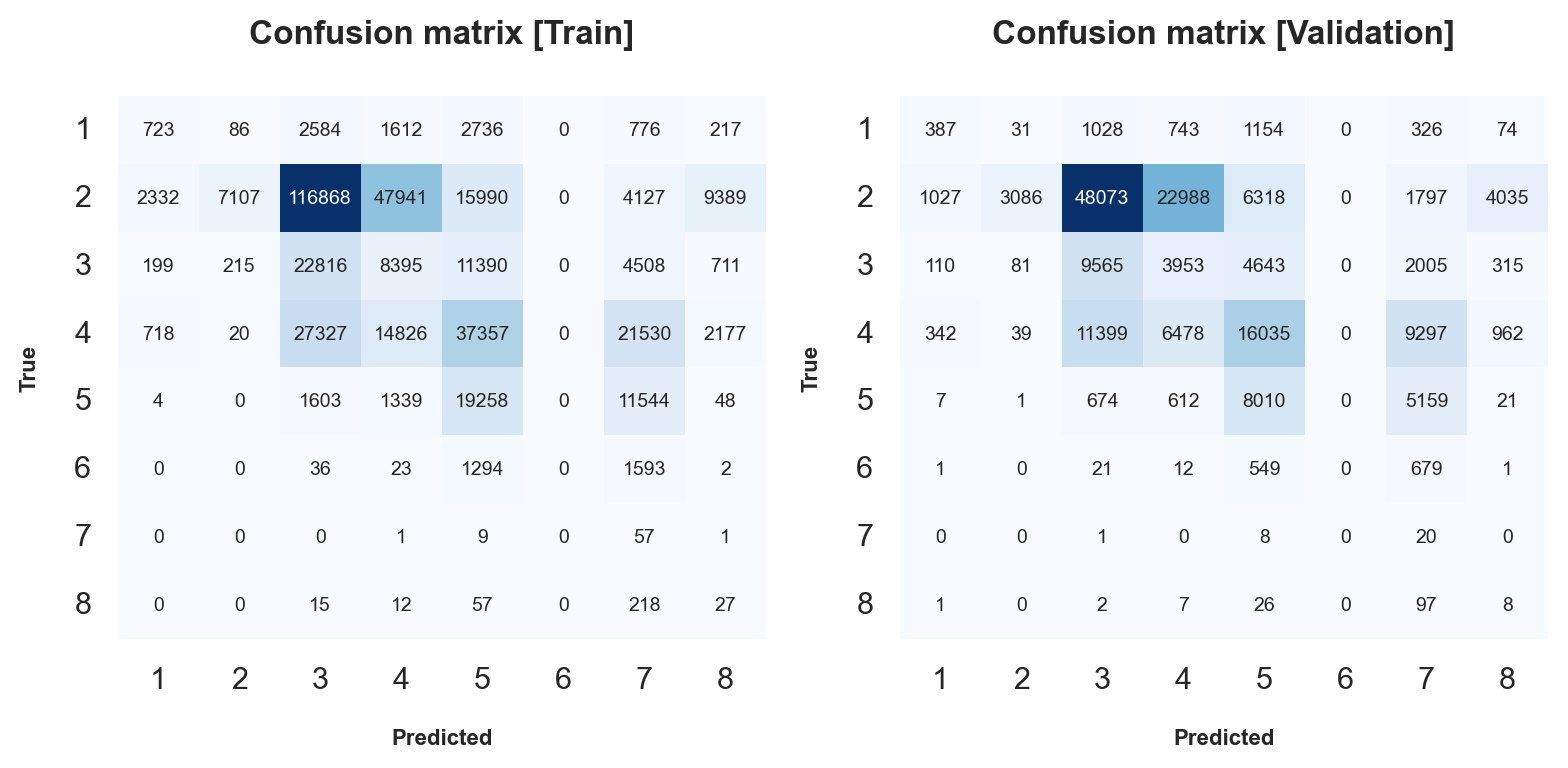

In [65]:
# Classification Metrics & Confusion Matrix
classification_metrics(y_train, nb_predicted_train, nb_predicted_prob_train, y_val, nb_predicted, nb_predicted_prob)

### **K-Nearest Neighbors (KNN)[<sup>[3]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**

In [66]:
# KNN | K-Nearest Neighbors
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_norm,y_train,cv=5)

# Train the model
knn.fit(X_train_norm, y_train)

# Test the model [on the Train set]
knn_predicted_prob_train = knn.predict_proba(X_train_norm)
knn_predicted_train = knn.predict(X_train_norm)
knn_y_proba_train = knn.predict_proba(X_train_norm)

# Accuracy, AUC & F1-Score macro
print("Train | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_train, knn_predicted_train),2))
print("Train | AUC:", round(roc_auc_score(y_train, knn_predicted_prob_train, multi_class='ovr'), 2))
print("Train | F1-Score (macro):", round(metrics.f1_score(y_train, knn_predicted_train, average='macro'), 2))

# Test the model [on the Validation set]
knn_predicted_prob = knn.predict_proba(X_validation_norm)
knn_predicted = knn.predict(X_validation_norm)
knn_y_proba = knn.predict_proba(X_validation_norm)

# Accuracy, AUC & F1-Score macro
print("Validation | Accuracy (overall correct predictions):",  round(metrics.accuracy_score(y_val, knn_predicted),2))
print("Validation | AUC:", round(roc_auc_score(y_val, knn_predicted_prob, multi_class='ovr'), 2))
print("Validation | F1-Score (macro):", round(metrics.f1_score(y_val, knn_predicted, average='macro'), 2))

Accuracy (overall correct predictions): 0.69
Accuracy (overall correct predictions): 0.59


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.64      0.42      0.51      8734
           2       0.73      0.92      0.81    203754
           3       0.50      0.20      0.29     48234
           4       0.64      0.58      0.60    103955
           5       0.65      0.47      0.54     33796
           6       0.46      0.04      0.07      2948
           7       1.00      0.00      0.00        68
           8       0.53      0.02      0.05       329

    accuracy                           0.69    401818
   macro avg       0.64      0.33      0.36    401818
weighted avg       0.67      0.69      0.66    401818


AUROC: 0.94
____________

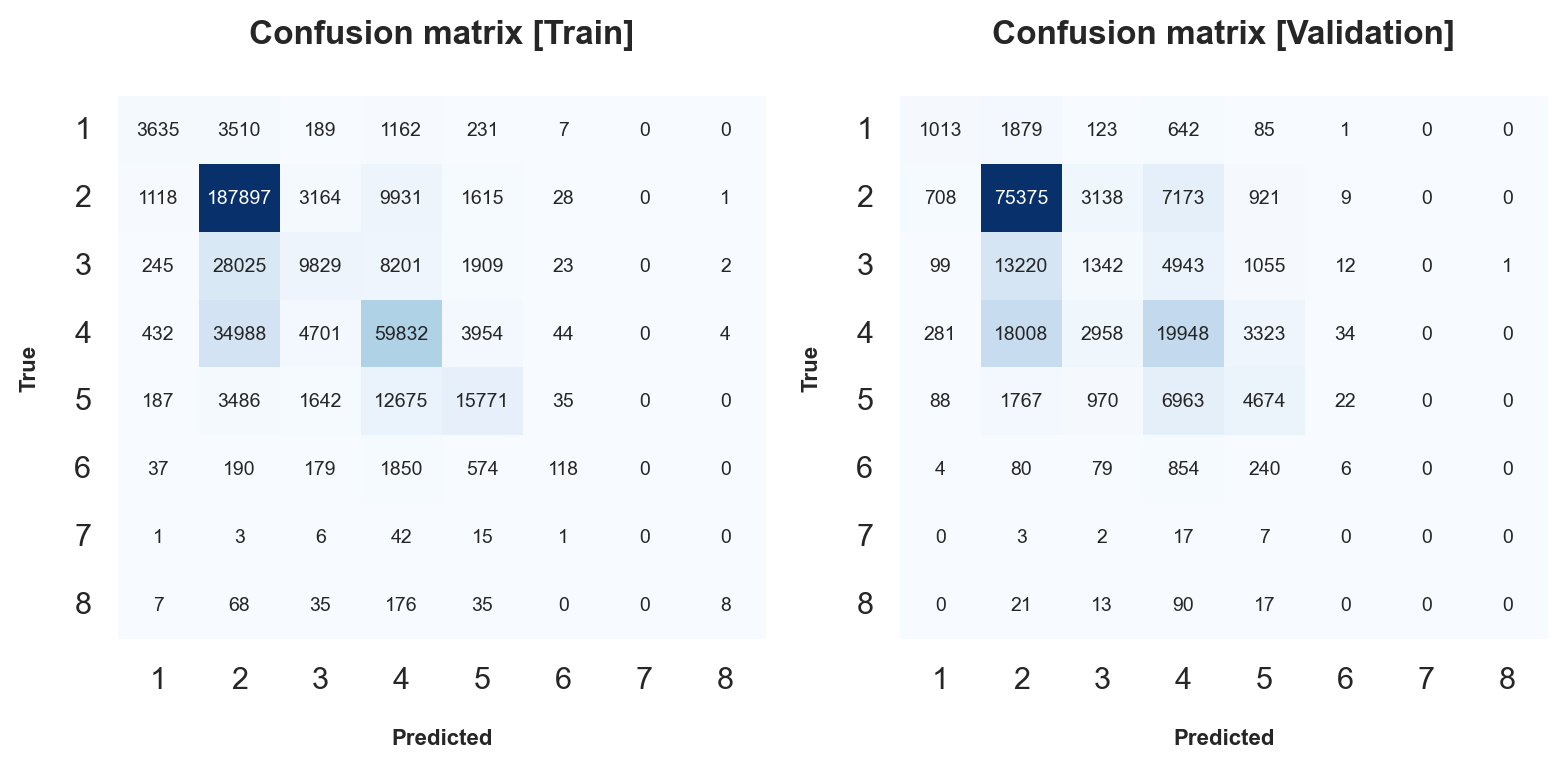

In [68]:
# Classification Metrics & Confusion Matrix
classification_metrics(y_train, knn_predicted_train, knn_predicted_prob_train, y_val, knn_predicted, knn_predicted_prob)

### **Decision Tree[<sup>[4]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

### **Random Forest[<sup>[5]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html)**

### **Support Vector Machine (SVM)[<sup>[6]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html)**

### **Gradient Boosting[<sup>[7]</sup>](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)**

### **XGBoost[<sup>[8]</sup>](https://xgboost.readthedocs.io/en/latest/python/python_api.html)**

---

### <a class='anchor' id='3_1'></a> **🧪 Model Selection**

---

### <a class='anchor' id='3_2'></a> **📏 Model Evaluation**

---

### <a class='anchor' id='3_3'></a> **📈 Model Optimization**

---

### 📊 **Feature Importance**

---

## 🔮 **Test Data Prediction**

In [60]:
test_data

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Number of Dependents,Birth Year Clean,Age at Injury Clean,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution_encoded,Attorney/Representative_encoded,Carrier Type_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,Gender_encoded,Medical Fee Region_encoded
0,19,183.343831,2003.000000,6165911,48.000000,31.000000,10.000000,54.000000,1,2003.000000,19.00000,2022.000000,12.000000,24.000000,5.000000,2023,1,2,0,2023.000000,1.000000,2.000000,0.000000,0,0,0,2,0,1,3
1,19,183.343831,2003.000000,6166141,45.000000,75.000000,10.000000,10.000000,1,2003.000000,19.00000,2022.000000,11.000000,20.000000,6.000000,2023,1,2,0,2023.000000,1.000000,2.000000,0.000000,0,0,0,40,0,0,3
2,59,0.000000,1963.000000,6165907,56.000000,68.000000,49.000000,62.000000,0,1963.000000,59.00000,2022.000000,12.000000,26.000000,0.000000,2023,1,2,0,2022.000000,12.000000,31.000000,5.000000,0,0,0,60,0,0,2
3,55,0.000000,0.000000,6166047,48.000000,25.000000,10.000000,53.000000,6,1968.000000,55.00000,2022.000000,12.000000,28.000000,2.000000,2023,1,2,0,2023.000000,1.000000,2.000000,0.000000,0,0,0,40,0,0,3
4,25,0.000000,1997.000000,6166102,55.000000,79.000000,40.000000,37.000000,5,1997.000000,25.00000,2022.000000,12.000000,20.000000,1.000000,2023,1,2,0,2022.000000,12.000000,31.000000,5.000000,0,0,0,23,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,52,183.343831,1960.000000,6553137,58.653581,53.335678,38.373674,31.516109,5,1960.000000,52.00000,2012.000000,9.000000,12.000000,2.000000,2024,6,5,2,2012.000000,10.000000,23.000000,1.000000,0,0,1,22,0,1,0
387971,59,0.000000,1965.000000,6553119,58.653581,53.335678,38.373674,31.516109,1,1965.000000,59.00000,2024.000000,5.000000,22.000000,2.000000,2024,6,5,2,2023.276784,5.488493,15.744215,2.172128,0,1,2,51,0,0,3
387972,45,0.000000,1979.000000,6553542,58.653581,53.335678,38.373674,31.516109,5,1979.000000,45.00000,2024.000000,5.000000,6.000000,0.000000,2024,6,5,2,2023.276784,5.488493,15.744215,2.172128,0,1,1,40,0,1,3
387973,42,0.000000,1981.000000,6553455,58.653581,53.335678,38.373674,31.516109,5,1981.000000,42.00000,2024.000000,2.000000,24.000000,5.000000,2024,6,5,2,2023.276784,5.488493,15.744215,2.172128,0,1,3,40,0,1,3


In [61]:
# Predict the test data
lr_predicted_test = lr.predict(X_test_norm)

# Dictionary with the mapping of the predicted values
claim_injury_type_dict_swapped = {1: "1. CANCELLED", 2: "2. NON-COMP", 3: "3. MED ONLY", 4: "4. TEMPORARY",
                                  5: "5. PPD SCH LOSS", 6: "6. PPD NSL", 7: "7. PTD", 8: "8. DEATH"}

# Create a DataFrame with the 'ID' and the 'Predicted' columns
submission_data = pd.DataFrame({'Claim Identifier': test_data['Claim Identifier'], 'Claim Injury Type': lr_predicted_test})
submission_data['Claim Injury Type'] = submission_data['Claim Injury Type'].map(claim_injury_type_dict_swapped)

# Display the first 2 rows of the submission_data
submission_data.head(2)

,Claim Identifier,Claim Injury Type
0,6165911,2. NON-COMP
1,6166141,2. NON-COMP


---

## 📋 **CSV Export - Submission**

In [62]:
# Each submission in Kaggle should have different names and should have the version name in the following format 
# – GroupXX_VersionXX.csv (for example, Group 1 submitted his 8th version, the file should be named Group01__Version08.csv)

submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')
# submission_data.to_csv('submissions/Group33_Version01.csv', index=False, header=True, sep=',')

---